# Homework 2

In [1]:
##### IMPORTS
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
x_file = files.upload()
y_file = files.upload()

Saving x.dat to x.dat


Saving y.dat to y.dat


In [2]:
X_table = pd.read_table("x.dat", sep="\s+", names=["x_1", "x_2"])
X_train = np.array(X_table)
# print(X_train)
Y_table = pd.read_table("y.dat", sep="\s+", names=["y"])
Y_train = np.array(Y_table)
# print(Y_train)

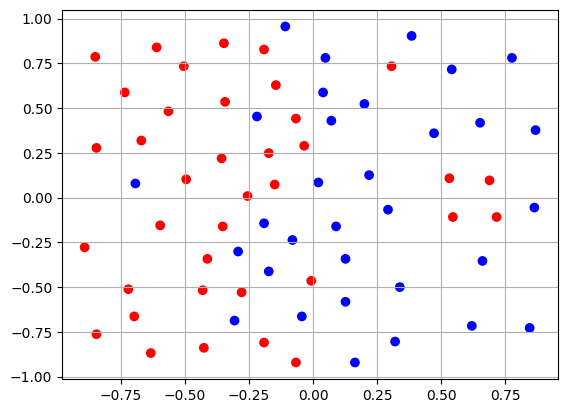

In [3]:
xrange = X_train[:, 0]
yrange = X_train[:, 1]
y_color = ['red' if i == 0 else 'blue' for i in Y_train]
plt.scatter(xrange, yrange, c=y_color)
plt.grid(axis='both')

In [36]:
def RegressionAtHome(X_train, Y_train, x_q, tau):

    pass


    # class_weight
    # {class_label : weight}

    # what is m in the cost function???
    # use class_weights to incorporate weights into class function
    # but what is m??? and will this actually work?
    # log_reg = LogisticRegression()
    # log_reg.fit(X_train, y_train)


    # # modify class_weight = weights

    # pass #FIXME


# Gradient is first partial derivatives of the cost function
# Hessian Matrix is second partial derivatives of the cost function
# Newton's method uses gradient and hessian for,,,, something


## NEWTON'S METHOD
# start with random theta
# calculate gradient, diagonal, hessian for each iteration
# theta + 1 = theta - inverse hessian * gradient
# with final theta, run hypothesis again and get 0 or 1
def newtons_method(X_train, x_i, y_i, x_q, tau, lamb):
    theta = np.array([random.uniform(0,10), random.uniform(0,10)])
    # print(theta)
    weights = [calc_weight(x_q, xi, tau) for xi in X_train]
    w_i = calc_weight(x_q, x_i, tau)
    # iterate
    for i in range(200):
        # weight_theta = calc_weight(x_q, theta, tau)
        diagonal_matrix = diagonal(weights, X_train, theta)
        hessian = hessian_matrix(X_train, diagonal_matrix, lamb)
        theta = theta - np.matmul(np.linalg.inv(hessian), gradient_J(X_train, w_i, y_i, x_i, lamb, theta))
    return theta

# J function -- this is what we're trying to optimize
# do we actually need this?
def J(lamb, theta, w_i, y_i, x_i, m):  # can't call it lambda bc python
    sum = 0
    for j in range(m):
        sum += w_i * (y_i * math.log(h(theta, x_i)) + (1 - y_i) * math.log(1 - h(theta, x_i)))
    return ((-1 * lamb * magnitude(theta)**2) / 2) + sum


# calculate the sigmoid function for x_i
def h(theta, x_i):
    # sigmoid function
    x_i = np.array(x_i)
    t = np.matmul(x_i.T, theta)  # if we're using the transpose of x_i, is this basically just a dot product? does this give a scalar?
    print(t)
    val = 1 / (1 - math.exp(-1 * t))  # overflowing if t negative and kinda big
    return val
    # return 1 or 0 based on calculated value?
    # if val > 0.5:
    #     return 1
    # else:
    #     return 0

# calculate gradient of J (w.r.t theta)
def gradient_J(X, w_i, y_i, x_i, lamb, theta):
    gradient = x_i.T * (w_i * (y_i - h(theta, x_i))) - lamb * theta
    return gradient


# Hessian Matrix???
def hessian_matrix(X, D, lamb):
    multiplied_matrix = np.matmul(np.matmul(X.T, D), X)
    hessian = multiplied_matrix - lamb * np.eye(multiplied_matrix.shape[0])
    return hessian

# Diagonal Matrix
def diagonal(weights, X, theta):
    diagonal_matrix = np.eye(len(X))
    for i in range(diagonal_matrix.shape[0]):
        diagonal_matrix[i][i] = -1 * weights[i] * h(theta, X[i]) * (1 - h(theta, X[i]))
    return diagonal_matrix


# calculate the magnitude of a vector
def magnitude(vector):
    mag = np.linalg.norm(vector)
    return mag

# calculate the weight based on point x_q
def calc_weight(x_q, x_i, tau):
    x_q = np.array(x_q)
    x_i = np.array(x_i)
    difference = x_q - x_i
    w_i = math.exp(-1 * (magnitude(difference)**2) / (2 * tau**2))
    return w_i


##### MAIN FUNCTION
def main():
    x_q = [1,1]
    tau = 0.5
    lamb = 0.5
    predicted = []
    for i in range(len(X_train)):
        theta = newtons_method(X_train, X_train[i], Y_train[i], x_q, tau, lamb)
        if h(theta, X_train[i]) > 0.5:
            predicted.append(1)
        else:
            predicted.append(0)
        print(i)
    print(predicted)

##### PRINTS DOWN HERE
main()


Streaming output truncated to the last 5000 lines.
-0.32843941830830703
-0.2129597946807656
-0.2129597946807656
-0.11090958915734386
-0.11090958915734386
-0.06634197186544469
-0.06634197186544469
0.00943475773577139
0.00943475773577139
0.14357712260419841
0.14357712260419841
0.2509415573273807
0.2509415573273807
0.14409156918169602
0.14409156918169602
-0.06920885383979672
-0.06920885383979672
-0.11589616688462233
-0.11589616688462233
-0.14091799905845942
-0.14091799905845942
-0.21398467427655263
-0.21398467427655263
-0.21496861009963825
-0.21496861009963825
-0.32773817589204557
-0.32773817589204557
-0.3647410012791835
-0.3647410012791835
-0.3127744255522411
-0.3127744255522411
-0.13167204408780567
-0.13167204408780567
-0.06517124218539455
-0.06517124218539455
0.04955620209228108
0.04955620209228108
-0.002803946715844635
-0.002803946715844635
0.15731920875375438
0.15731920875375438
0.2421650896945693
0.2421650896945693
0.19760746607787566
0.19760746607787566
-0.04235001667700569
-0.0423

OverflowError: ignored

## Problem 2

1. Soft-Margin Linear SVM, C=.02 corresponds to graph #4. This is a linear model with larger margins, so the C value is lower.
2. Soft-Margin Linear SVM, C=20 corresponds to graph #3. This is a linear model with smaller margins, so the C value is higher.
3. A hard-margin kernel SVM with $k(u,v) = uv - (uv)^2$ corresponds to graph #5. This is a polynomial kernel, which matches the shape of this decision boundary.
4. A hard-margin kernel SVM with $k(u,v) = exp(-5\|u-v\|^2)$ corresponds to graph #6. The high gamma value (5) implies that the decision boundary will be overfitted.
5. A hard margin kernel SVM with $k(u,v) = exp(-\frac{1}{5}\|u-v\|^2)$ corresponds to graph #1. The relatively low gamma value of $\frac{1}{5}$ implies that the decision boundary will not be overfitted.
